In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [2]:
# 1) Load dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

In [3]:
print(wine.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [4]:
X = wine.drop(columns=["quality"])  # All the features used to predict quality
y = wine["quality"]                 # The actual quality score we want to predict

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 2) Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# 3) Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# 4) Predictions
y_pred = reg_model.predict(X_test)

In [9]:
# 5) Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Regression Evaluation Metrics (Test Set) ===")
print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

=== Regression Evaluation Metrics (Test Set) ===
MSE: 0.390, RMSE: 0.625, MAE: 0.504, R²: 0.403


In [10]:
# 6) 5-Fold Cross Validation
y_cv = cross_val_predict(reg_model, X_scaled, y, cv=5)
mse_cv = mean_squared_error(y, y_cv)
rmse_cv = math.sqrt(mse_cv)
mae_cv = mean_absolute_error(y, y_cv)
r2_cv = r2_score(y, y_cv)

print("\n=== 5-Fold Cross-Validation Metrics ===")
print(f"MSE: {mse_cv:.3f}, RMSE: {rmse_cv:.3f}, MAE: {mae_cv:.3f}, R²: {r2_cv:.3f}")


=== 5-Fold Cross-Validation Metrics ===
MSE: 0.437, RMSE: 0.661, MAE: 0.510, R²: 0.330


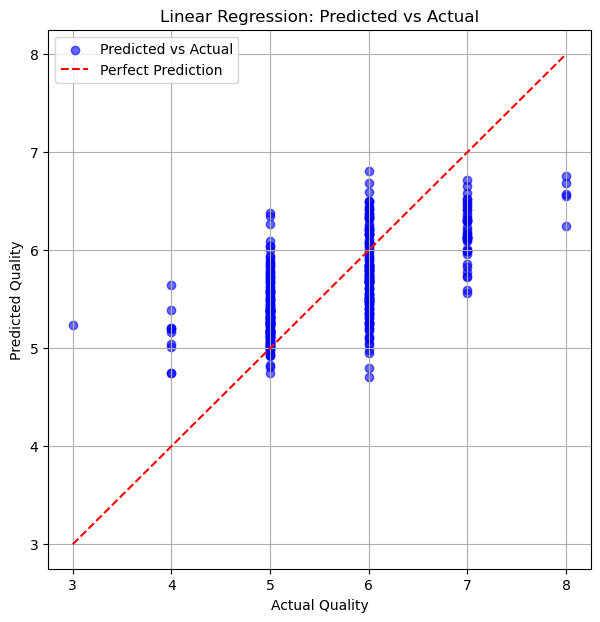


Explanation of Curve:
- Each blue dot represents a test data point: x=actual, y=predicted.
- Red dashed line represents perfect prediction (y=x).
- Points close to the red line → model predicted well.
- Points far from the line → model made errors.


In [11]:
# 7) Predicted vs Actual Curve
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()
print("\nExplanation of Curve:")
print("- Each blue dot represents a test data point: x=actual, y=predicted.")
print("- Red dashed line represents perfect prediction (y=x).")
print("- Points close to the red line → model predicted well.")
print("- Points far from the line → model made errors.")

Iteration 0, Cost: 16.2083
Iteration 100, Cost: 2.3441
Iteration 200, Cost: 0.4956
Iteration 300, Cost: 0.2476
Iteration 400, Cost: 0.2141
Iteration 500, Cost: 0.2094
Iteration 600, Cost: 0.2087
Iteration 700, Cost: 0.2085
Iteration 800, Cost: 0.2085
Iteration 900, Cost: 0.2085

=== Gradient Descent Linear Regression Metrics ===
MSE: 0.417
RMSE: 0.646
R² Score: 0.360


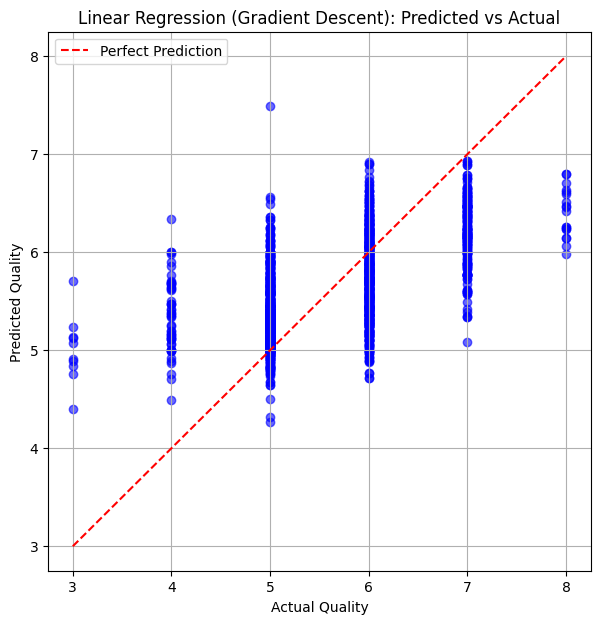

In [ ]:

# -----------------------------------------------------------
# 1) Load dataset
# -----------------------------------------------------------
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

X = wine.drop(columns=["quality"]).values  # Convert to NumPy array
y = wine["quality"].values.reshape(-1, 1) # Column vector

# -----------------------------------------------------------
# 2) Feature Scaling
# -----------------------------------------------------------
# Scale features to mean=0, std=1
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Add bias term (column of ones)
X_scaled = np.hstack([np.ones((X_scaled.shape[0],1)), X_scaled])  # X0 = 1 for intercept

# -----------------------------------------------------------
# 3) Gradient Descent Parameters
# -----------------------------------------------------------
learning_rate = 0.01
n_iterations = 1000
m = X_scaled.shape[0]  # Number of samples
n_features = X_scaled.shape[1]

# Initialize weights randomly
theta = np.zeros((n_features, 1))  # Column vector for weights

# -----------------------------------------------------------
# 4) Gradient Descent Loop
# -----------------------------------------------------------
for i in range(n_iterations):
    y_pred = X_scaled.dot(theta)            # Predictions
    error = y_pred - y                       # Difference between predicted and actual
    cost = (1/(2*m)) * np.sum(error**2)    # MSE cost function

    gradients = (1/m) * X_scaled.T.dot(error)  # Gradient calculation
    theta = theta - learning_rate * gradients  # Update weights

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

# -----------------------------------------------------------
# 5) Final Predictions
# -----------------------------------------------------------
y_pred_final = X_scaled.dot(theta)

# -----------------------------------------------------------
# 6) Regression Evaluation Metrics
# -----------------------------------------------------------
mse = np.mean((y - y_pred_final)**2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y - y_pred_final)**2) / np.sum((y - y.mean())**2)

print("\n=== Gradient Descent Linear Regression Metrics ===")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# -----------------------------------------------------------
# 7) Predicted vs Actual Curve
# -----------------------------------------------------------
plt.figure(figsize=(7,7))
plt.scatter(y, y_pred_final, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression (Gradient Descent): Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()

Lasso and Ridge Regression, which are regularized linear regression models.
These help prevent overfitting when features are correlated or when the dataset is large.

In [ ]:
# -----------------------------------------------------------
# Lasso and Ridge Regression
# Dataset: Wine Quality
# -----------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# 1) Load dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

X = wine.drop(columns=["quality"])
y = wine["quality"]

# 2) Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

=== Lasso Regression Metrics ===
MSE: 0.439, RMSE: 0.662, MAE: 0.549, R²: 0.328
Lasso 5-Fold CV MSE: 0.4678360098848558

=== Ridge Regression Metrics ===
MSE: 0.390, RMSE: 0.625, MAE: 0.504, R²: 0.403
Ridge 5-Fold CV MSE: 0.4365912408061395


In [ ]:
# -----------------------------------------------------------
# 4) Lasso Regression
# -----------------------------------------------------------
lasso_model = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression Metrics ===")
print(f"MSE: {mse_lasso:.3f}, RMSE: {rmse_lasso:.3f}, MAE: {mae_lasso:.3f}, R²: {r2_lasso:.3f}")

# 5-Fold Cross Validation
y_cv_lasso = cross_val_predict(lasso_model, X_scaled, y, cv=5)
print("Lasso 5-Fold CV MSE:", mean_squared_error(y, y_cv_lasso))

In [ ]:
# -----------------------------------------------------------
# 5) Ridge Regression
# -----------------------------------------------------------
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n=== Ridge Regression Metrics ===")
print(f"MSE: {mse_ridge:.3f}, RMSE: {rmse_ridge:.3f}, MAE: {mae_ridge:.3f}, R²: {r2_ridge:.3f}")

# 5-Fold Cross Validation
y_cv_ridge = cross_val_predict(ridge_model, X_scaled, y, cv=5)
print("Ridge 5-Fold CV MSE:", mean_squared_error(y, y_cv_ridge))


Linear Regression vs Lasso vs Ridge predictions vs actual VS gradient descent Plot:

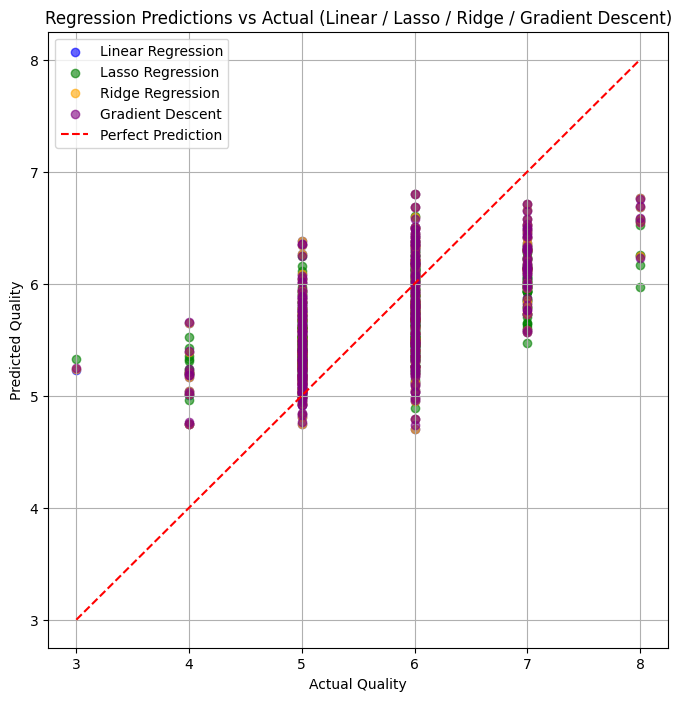

In [ ]:
# -----------------------------------------------------------
# Linear vs Lasso vs Ridge vs Gradient Descent
# Predicted vs Actual Plot
# -----------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import math

# 1) Load dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

X = wine.drop(columns=["quality"]).values
y = wine["quality"].values.reshape(-1, 1)

# 2) Feature scaling
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 3) Linear Regression (scikit-learn)
# -----------------------------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# -----------------------------------------------------------
# 4) Lasso Regression
# -----------------------------------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# -----------------------------------------------------------
# 5) Ridge Regression
# -----------------------------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# -----------------------------------------------------------
# 6) Gradient Descent Linear Regression (from scratch)
# -----------------------------------------------------------
# Add bias term
X_train_gd = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test_gd = np.hstack([np.ones((X_test.shape[0],1)), X_test])

theta = np.zeros((X_train_gd.shape[1], 1))
learning_rate = 0.01
n_iterations = 1000
m = X_train_gd.shape[0]

for i in range(n_iterations):
    y_pred_train = X_train_gd.dot(theta)
    gradients = (1/m) * X_train_gd.T.dot(y_pred_train - y_train)
    theta = theta - learning_rate * gradients

y_pred_gd = X_test_gd.dot(theta)

# -----------------------------------------------------------
# 7) Plot Predicted vs Actual
# -----------------------------------------------------------
plt.figure(figsize=(8,8))

plt.scatter(y_test, y_pred_lin, alpha=0.6, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label='Lasso Regression', color='green')
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Ridge Regression', color='orange')
plt.scatter(y_test, y_pred_gd, alpha=0.6, label='Gradient Descent', color='purple')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Regression Predictions vs Actual (Linear / Lasso / Ridge / Gradient Descent)")
plt.legend()
plt.grid(True)
plt.show()